# Исследование видеоигр

# Введение

### Описание проекта 
Проект нацелен на анализ данных об играх из открытых источников для того, чтобы установить параметры, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
### Цель проекта
Выявить определяющие успешность игры закономерности.
### Описание данных
**Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы.**  

В таблице представлены следующие значения:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### План работы
1. [Изучение общей информации о данных](#section_1)
2. [Предобработка данных](#section_2)
  - [Переименование столбцов](#section_2_1)
  - [Обработка дубликатов](#section_2_2)
  - [Преобразование типов данных](#section_2_3)
  - [Обработка пропусков](#section_2_4)  
3. [Исследовательский анализ данных](#section_3)
  - [Выпуск игр по годам](#section_3_1)
  - [Изменение продаж в зависимости от платформы](#section_3_2)
  - [Формирование прогноза по данным на актуальный период](#section_3_3)
  - [Определение потенциально прибыльных платформ](#section_3_4)
  - [Изучение глобальных продаж игр в разбивке по платформам](#section_3_5)
  - [Влияние на продажи внутри платформ отзывов пользователей и критиков](#section_3_6)
  - [Изучение распределений игр по жанрам](#section_3_7)  
4. [Составление портрета пользователя каждого региона (NA, EU, JP)](#section_4)
  - [Самые популярные платформы (топ-5)](#section_4_1)
  - [Самые популярные жанры (топ-5)](#section_4_2)
  - [Влияние рейтинга ESRB на продажи в отдельных регионах](#section_4_2)
5. [Проверка гипотез](#section_5)
  - [Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#section_5_1)
  - [Гипотеза №2. Средние пользовательские рейтинги жанров Action и Sports разные](#section_5_2)
6. [Общий вывод](#section_6)

<a id='section_1'></a>
## Изучение общей информации о данных 

### Импортируем необходимые библиотеки и изучим основную информацию о предоставленных данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
try:
    data = pd.read_csv(r'D:\projects_data\games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

pd.set_option('display.max_columns', None)

raw_data = data.copy(deep=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<a id='section_2'></a>
## Предобработка данных

<a id='section_2_1'></a>
### Переименование столбцов 

In [4]:
data.columns = data.columns.str.lower()

<a id='section_2_2'></a>
### Обработка дубликатов

In [5]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

<a id='section_2_4'></a>
### Обработка пропусков

In [6]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


В столбце user_score присутствуют строки с аббревиатурой tbd , которая означает, что оценка подлежит уточнению. Так как нам для исследования эта информация не пригодится, заменим аббревиатуру значением NaN.

In [7]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [8]:
data['user_score'] = data['user_score'].replace('tbd',-1)

In [9]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Количество пропусков в %'+"\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('Пропусков не осталось')

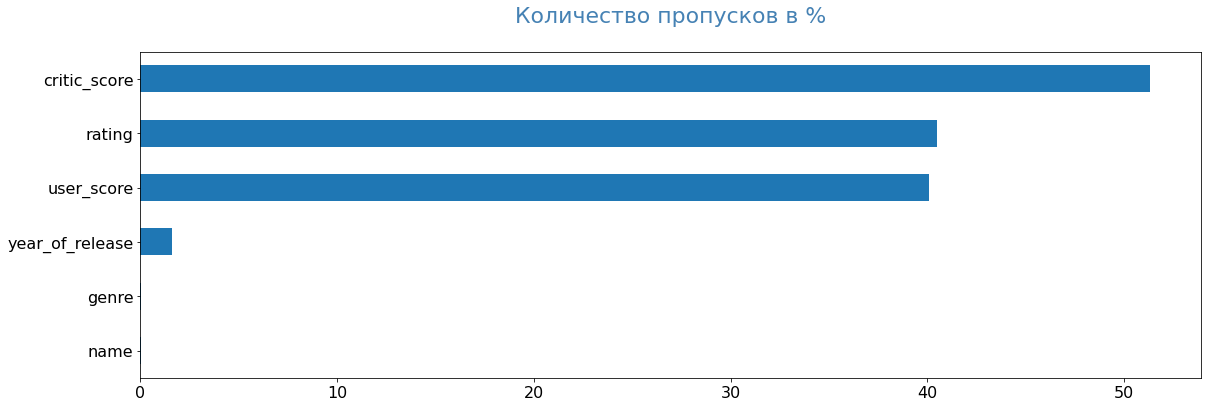

In [10]:
pass_value_barh(data)

Пропуски в столбцах `genre` , `name` и `year_of_release` восстановить невозможно, но так как в сумме их менее 5%, удаление этих строк не повлияет на результат исследования.

In [11]:
data = data.loc[~data['genre'].isna() & ~data['name'].isna() & ~data['year_of_release'].isna()].reset_index(drop=True)

In [12]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

A вот пропуски в остальных столбцах составляют не менее 40% от общего числа записей. Поэтому необходимо оценить распределение этих пропусков.

In [13]:
(
    data
    .loc[data['critic_score'].isna() & 
         data['user_score'].isna() & 
         data['rating'].isna()][['critic_score','user_score','rating']]
    .shape
)

(6534, 3)

Видно, что практически все пропуски оценок и рейтинга встречаются одновременно, а именно в 6534 строках, можно было бы предположить, что непопулярные игры не получают оценок и рейтинга, но в списке есть и игры со значительным количеством продаж, которые не могли бы остаться незамеченными. Скорее всего пропуски связаны с ошибкой при выгрузке данных и никак не могут быть восстановлены, так как замена средним или медианой сильно скажется на результатах анализа.

Так как рейтинг ESRB присваивается играм в США и Канаде, следовательно, не все игры могут иметь этот рейтинг, потому что их попросту нет на североамериканском рынке.

In [14]:
data['rating'] = data['rating'].fillna('unknown')

<a id='section_2_3'></a>
### Преобразование типов данных

In [15]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = pd.to_numeric(data['user_score'], errors='ignore')

In [16]:
data[(data['user_score'] != 'tbd') & ((data['user_score'] != -1))]['user_score'].mean()

7.1263298941444955

Были изменён тип данных в столбце `year_of_release` на целочисленный тип, так как он содержит информацию о годе выпуска игры, и в столбце `user_score` c `object` на `float`.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


<a id='section_2_5'></a>
### Подсчитаем глобальные продажи

In [18]:
total_sales = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [19]:
data.insert(8, "total_sales", total_sales)

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknown


<a id='section_3'></a>
## Исследовательский анализ данных

<a id='section_3_1'></a>
### Выпуск игр по годам

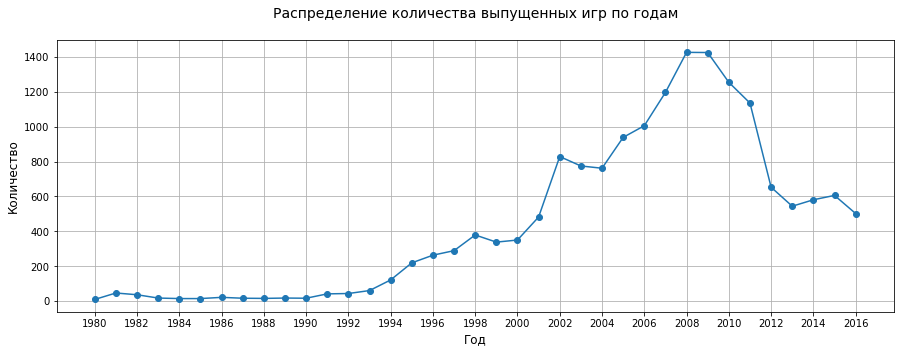

In [21]:
fig, ax = plt.subplots()
(
    data
    .groupby('year_of_release')['name']
    .count()
    .plot(kind='line', style='o-' ,grid=True, figsize=(15,5))
)

ax.set_title('Распределение количества выпущенных игр по годам'+"\n", size=14)

ax.set_xlabel('Год', size=12)
ax.set_ylabel('Количество', size=12)

ax.locator_params(axis='x', nbins=20)

plt.show()

На графике мы можем наблюдать длинный левый хвост, который говорит нам о практически незначимом количества продаж до 1993 года.

<a id='section_3_2'></a>
### Изменение продаж по годам в зависимости от платформы

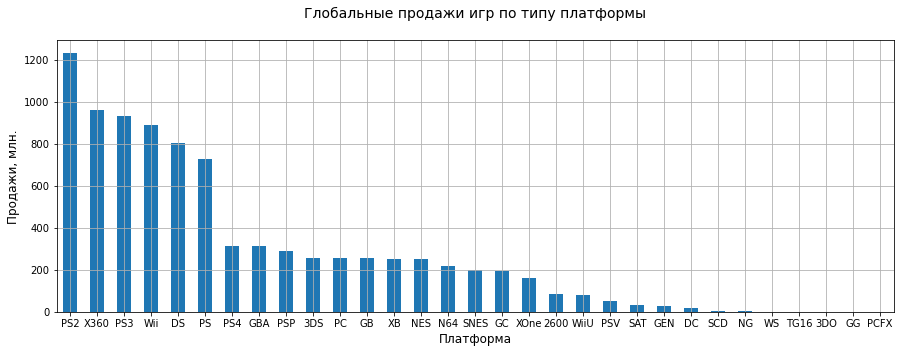

In [22]:
fig, ax = plt.subplots()

(
    data
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .plot(kind='bar', grid=True, figsize=(15,5))
)

ax.set_title('Глобальные продажи игр по типу платформы'+"\n", fontsize=14)

ax.set_xlabel('Платформа', fontsize=12)
ax.set_ylabel('Продажи, млн.', fontsize=12)

plt.xticks(rotation=0)

plt.show()

Возьмём 6 самых популярных игровых платформ.

In [23]:
top = ['PS2','X360','PS3','Wii','DS','PS']

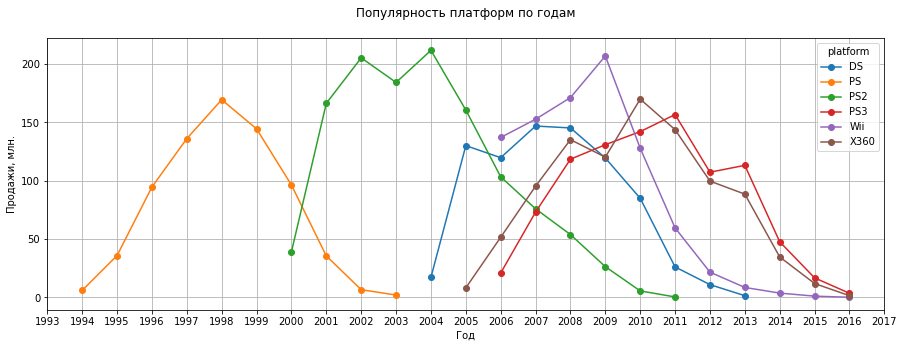

In [24]:
(
    data[data['platform'].isin(top)]
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='line', style='o-',stacked=False, grid=True, figsize=(15,5))
)
plt.title('Популярность платформ по годам'+"\n")
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')

plt.locator_params(axis='x', nbins=30)

plt.xlim(1993,2017)

plt.show()

Исходя из графика можно сделать вывод, что популярные платформы появляются и исчезают в среднем примерно за 10 лет.

<a id='section_3_3'></a>
### Формирование прогноза по данным на актуальный период

Возьмём крайние 5 лет за актуальный период, так мы сможем точнее определить тренды на рынке видеоигр.

In [25]:
valid_data = data[data['year_of_release'] >= 2012]

<a id='section_3_4'></a>
### Определение потенциально прибыльных платформ

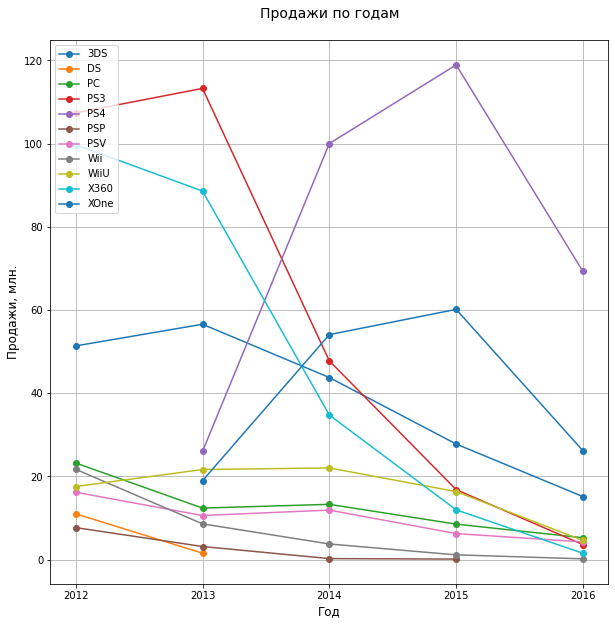

In [26]:
(
    valid_data
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='line', style='o-', grid=True, figsize=(10,10))
)

plt.title('Продажи по годам'+"\n", fontsize=14)

plt.xlabel('Год', fontsize=12)
plt.ylabel('Продажи, млн.', fontsize=12)

plt.legend(loc='upper left')

plt.locator_params(axis='x', nbins=6)

plt.xticks(rotation=0)

plt.show()

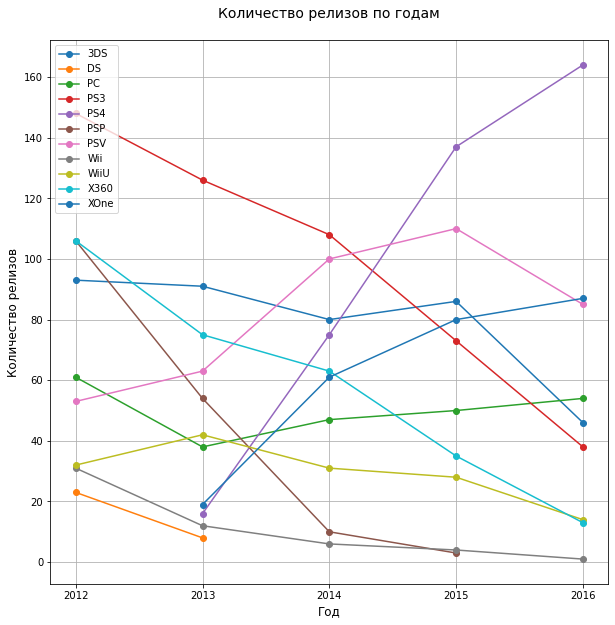

In [27]:
(
    valid_data
    .pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
    .plot(kind='line', style='o-', grid=True, figsize=(10,10))
)

plt.title('Количество релизов по годам'+"\n", fontsize=14)

plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество релизов', fontsize=12)

plt.legend(loc='upper left')

plt.locator_params(axis='x', nbins=6)

plt.xticks(rotation=0)

plt.show()

На графике продаж по платформам видно, что в индустрии происходит спад, продажи падают, но на графике количества релизов видно, что оно увеличивается на некоторых платформах, следовательно, в будущем они могут быть более популярными и прибыльными.   
На момент 2016 года лидером продаж являются платформы PS4, XONE и 3DS. Потенциально прибыльными будут возможно PS4 и XONE за счёт увелчения количества релизов в будущем.

<a id='section_3_5'></a>
### Изучение глобальных продаж игр в разбивке по платформам

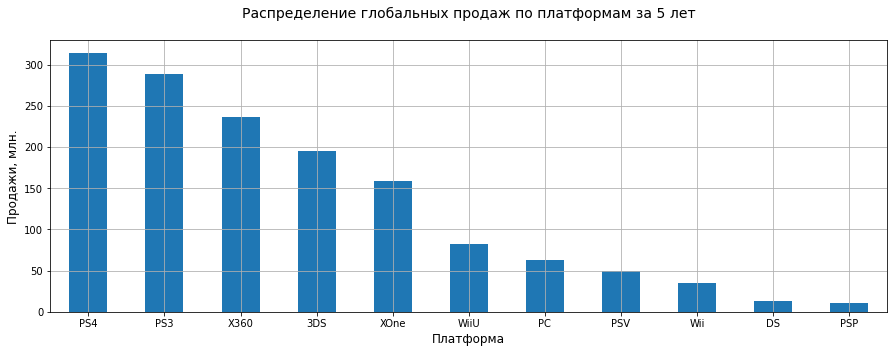

In [28]:
fig, ax = plt.subplots()

(
    valid_data
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .plot(kind='bar', grid=True, figsize=(15,5))
)

ax.set_title('Распределение глобальных продаж по платформам за 5 лет'+"\n", fontsize=14)

ax.set_xlabel('Платформа', fontsize=12)
ax.set_ylabel('Продажи, млн.', fontsize=12)

plt.xticks(rotation=0)

plt.show()

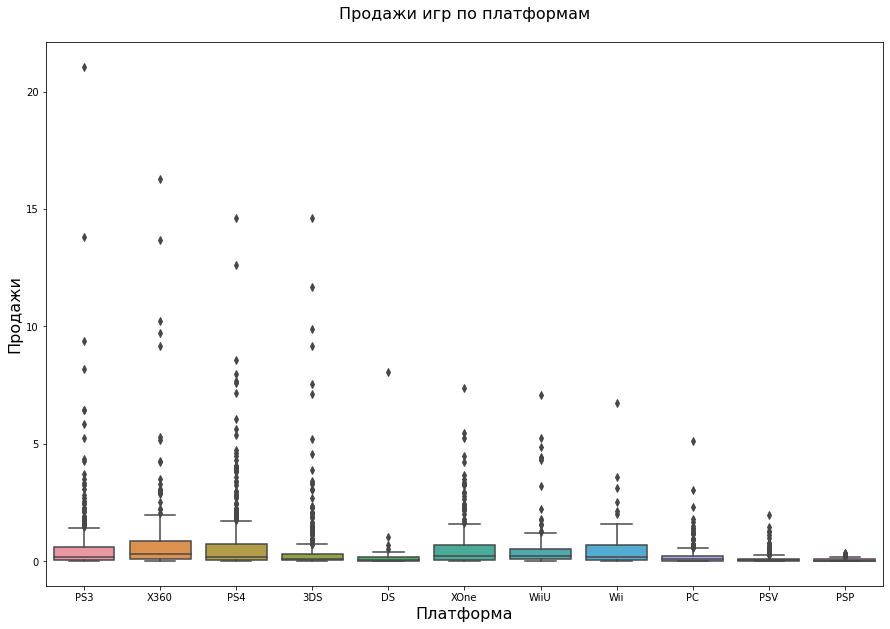

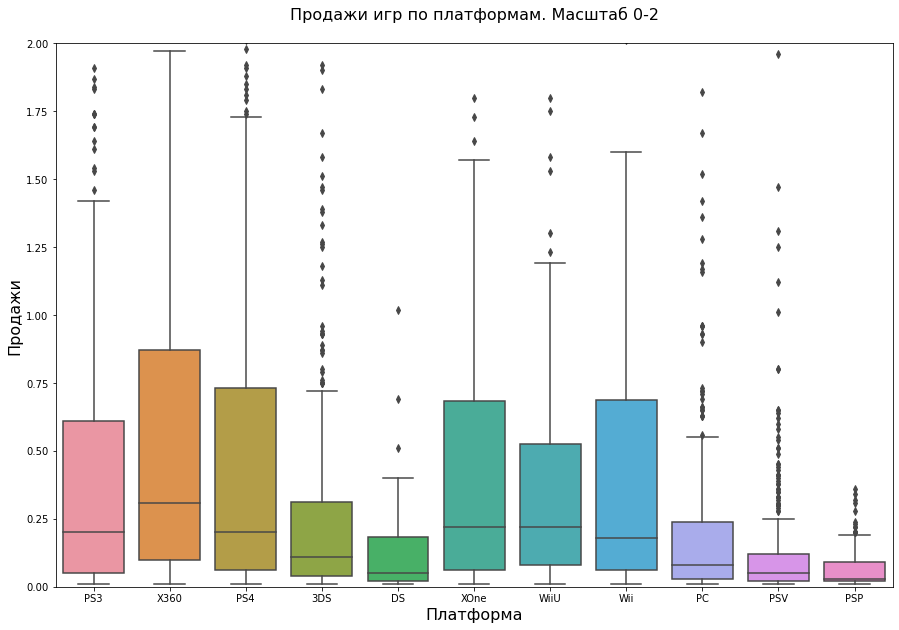

In [29]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(x=valid_data['platform'], y=valid_data['total_sales'])

plt.title('Продажи игр по платформам'+"\n", fontsize=16)

plt.xlabel('Платформа', fontsize=16)
plt.ylabel('Продажи', fontsize=16)

plt.xticks(rotation=0)

fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(x=valid_data['platform'], y=valid_data['total_sales'])

plt.title('Продажи игр по платформам. Масштаб 0-2'+"\n", fontsize=16)

plt.xlabel('Платформа', fontsize=16)
plt.ylabel('Продажи', fontsize=16)

plt.xticks(rotation=0)

plt.ylim(0,2)

plt.show()

<a id='section_3_6'></a>
### Влияние на продажи внутри платформы PS4 отзывов пользователей и критиков

In [30]:
data_ps4 = valid_data[valid_data['platform'] == 'PS4']

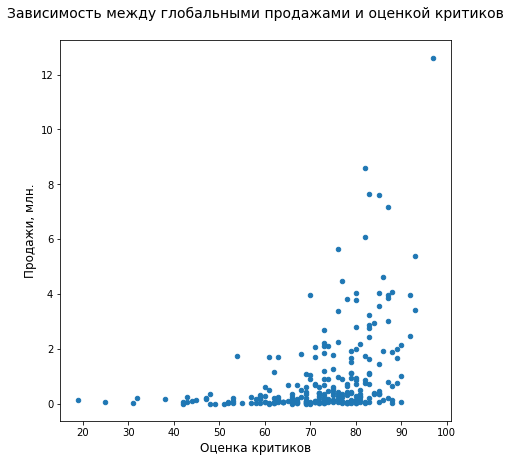

In [31]:
data_ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(7,7))

plt.title('Зависимость между глобальными продажами и оценкой критиков'+"\n", fontsize=14)

plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Продажи, млн.', fontsize=12)

plt.show()

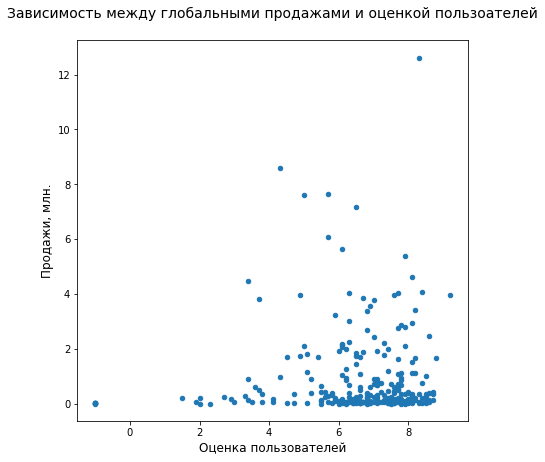

In [32]:
data_ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(7,7))

plt.title('Зависимость между глобальными продажами и оценкой пользоателей'+"\n", fontsize=14)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Продажи, млн.', fontsize=12)

plt.show()

In [33]:
data_ps4['user_score'].astype(float)
data_ps4['critic_score'].astype(float)
data_ps4[['user_score', 'critic_score','total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.509843,0.029110
critic_score,0.509843,1.000000,0.406568
total_sales,0.029110,0.406568,1.000000


Как мы видим между оценками пользователей и оценками критиков наблюдается средний уровень корреляции, между оценками критиков и глобальными продажами средний, а вот между оценками пользователей и продажами корреляции нет.

Сравним с показателями платформ PS3 и X360.

In [34]:
data_ps3 = valid_data[valid_data['platform'] == 'PS3']
data_x360 = valid_data[valid_data['platform'] == 'X360']

In [35]:
data_ps3[['user_score', 'critic_score','total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.558547,0.100366
critic_score,0.558547,1.000000,0.331497
total_sales,0.100366,0.331497,1.000000


In [36]:
data_x360[['user_score', 'critic_score','total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557352,0.066849
critic_score,0.557352,1.000000,0.360573
total_sales,0.066849,0.360573,1.000000


Как мы видим показатели корреляции отличаются незначительно.

<a id='section_3_7'></a>
### Изучение распределений продаж по жанрам игр

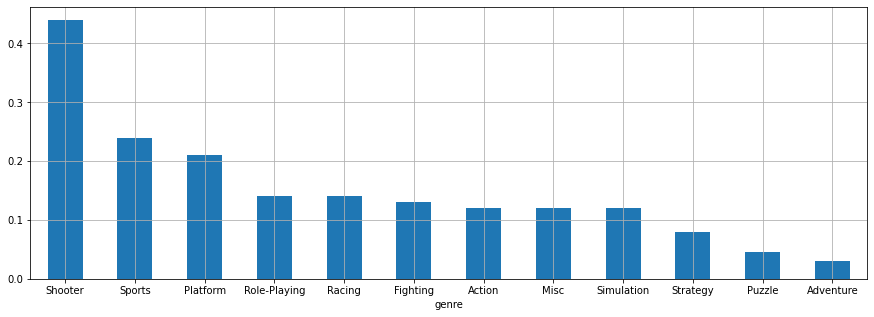

In [37]:
(
    valid_data
    .groupby('genre')['total_sales']
    .median()
    .sort_values(ascending=False)
    .plot(kind='bar', grid=True, figsize=(15,5))
)

ax.set_title('Медианное количество продаж по жанру'+"\n", fontsize=14)

ax.set_xlabel('Жанр', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

plt.xticks(rotation=0)

plt.show()

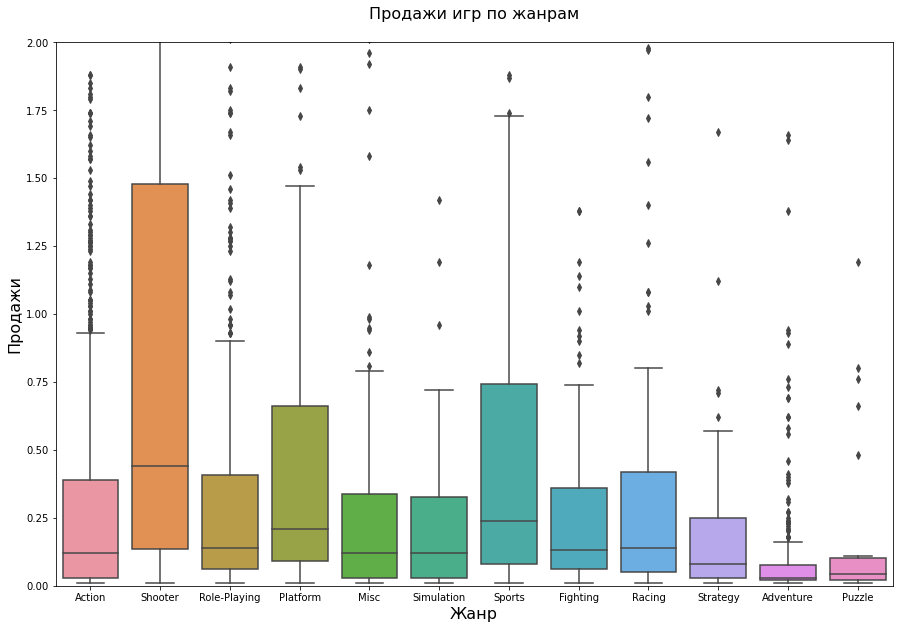

In [38]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(x=valid_data['genre'], y = valid_data['total_sales'])

plt.title('Продажи игр по жанрам'+"\n", fontsize=16)

plt.xlabel('Жанр', fontsize=16)
plt.ylabel('Продажи', fontsize=16)

plt.xticks(rotation=0)

plt.ylim(0,2)

plt.show()

Из графика распределения количества продаж по жанрам можно сделать вывод, что большим спросом пользуются игры, требующие большей активности от пользователей в процессе игры, а вот игры с размеренным темпом являются самыми низкодоходными.
Больше всех устойчивым спросом пользуются жанры `Shooter`, `Sports`, `Platform`.

<a id='section_4'></a>
## Составление портрета пользователя каждого региона (NA, EU, JP)

Рассмотрим топы за крайние 5 лет.

<a id='section_4_1'></a>
### Самые популярные платформы (топ-5)

In [39]:
def top_5_by_platform(region):
    (
        valid_data
        .groupby('platform')[region+'_sales']
        .sum()
        .sort_values(ascending=False)
        .head()
        .plot(kind='bar', grid=True, figsize=(10,5))
    )
    plt.title(f'Топ-5 {region.upper()}')

    plt.xlabel('Платформа', fontsize=12)
    plt.ylabel('Продажи', fontsize=12)

    plt.xticks(rotation=0)

    plt.ylim(0,200)
    plt.show()

#### Toп-5 NA

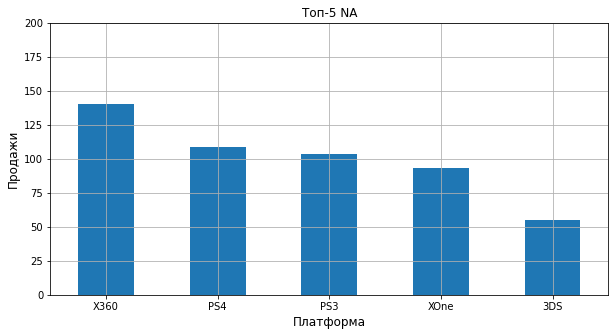

In [40]:
top_5_by_platform('na')

#### Toп-5 EU

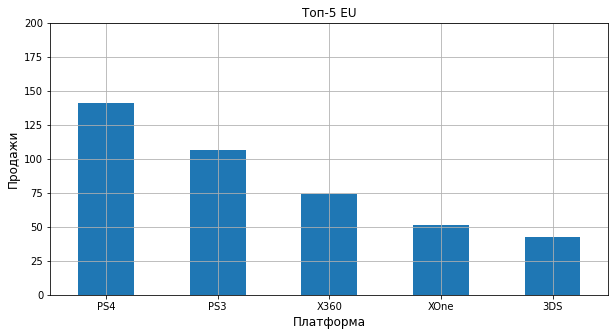

In [41]:
top_5_by_platform('eu')

#### Toп-5 JP

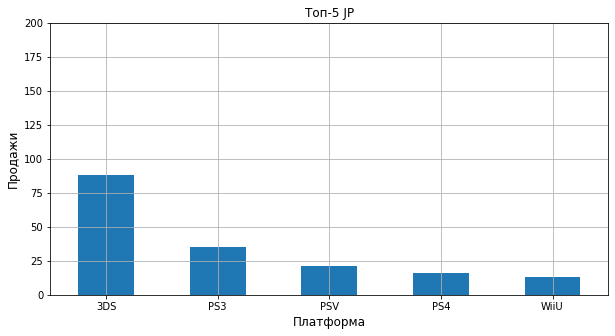

In [42]:
top_5_by_platform('jp')

На японском рынке продажи значительно ниже, чем на европейском или североамериканском, при этом есть различия в самых популярных платформах, в Японии платформа `3DS` занимает первое место, тогда как на рынке Европы и Америки она находится на 5 месте. На европеймком рынке лидирует `PS4`, а на североамериканском `X360`.

<a id='section_4_2'></a>
### Самые популярные жанры (топ-5)

In [43]:
def top_5_by_genre(region):
    (
        valid_data
        .groupby('genre')[region+'_sales']
        .sum()
        .sort_values(ascending=False)
        .head()
        .plot(kind='bar', grid=True, figsize=(10,5))
    )
    plt.title(f'Топ-5 {region.upper()}')

    plt.xlabel('Платформа', fontsize=12)
    plt.ylabel('Продажи', fontsize=12)

    plt.xticks(rotation=0)

    plt.ylim(0,200)
    plt.show()

#### Toп-5 NA

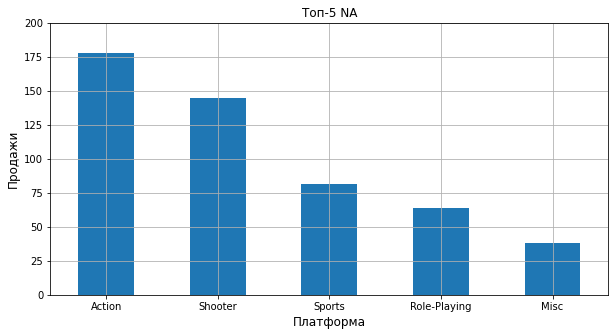

In [44]:
top_5_by_genre('na')

#### Toп-5 EU

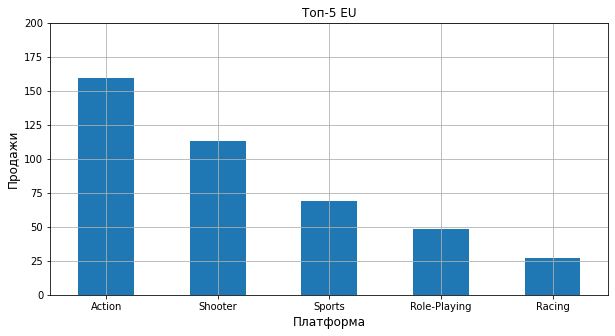

In [45]:
top_5_by_genre('eu')

#### Toп-5 JP

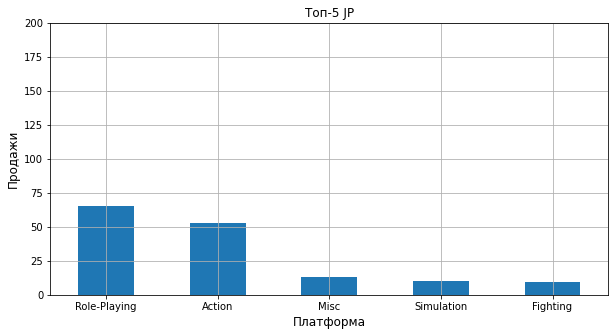

In [46]:
top_5_by_genre('jp')

Как мы видим, пользователи из Европы и Америки очень схожи в жанровых предпочтениях, лидирует жанр `Action`, а вот в Японии больше любят `Role-Playing`.

<a id='section_4_3'></a>
### Влияние рейтинга ESRB на продажи в отдельных регионах

Взглянем, как распределены продажи по рейтингу.

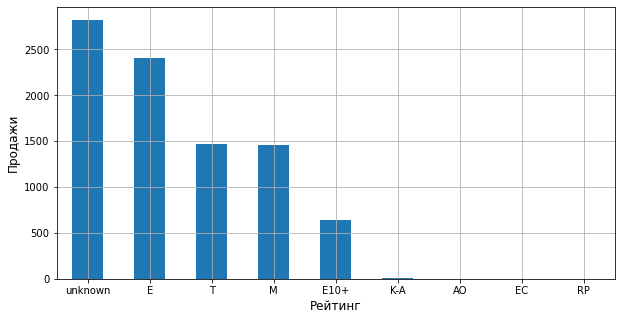

In [47]:
data.groupby('rating')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(10,5))

plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи', fontsize=12)

plt.xticks(rotation=0)

plt.ylim(0,)
plt.show()

In [48]:
def rating(region):
    (
        data
        .groupby('rating')[region+'_sales']
        .sum()
        .sort_values(ascending=False)
        .plot(kind='bar', grid=True, figsize=(10,5))
    )
    
    plt.title(f'Продажи по рейтингам в {region.upper()}')

    plt.xlabel('Платформа', fontsize=12)
    plt.ylabel('Продажи', fontsize=12)

    plt.xticks(rotation=0)

    plt.show()

#### Влияние рейтинга в NA

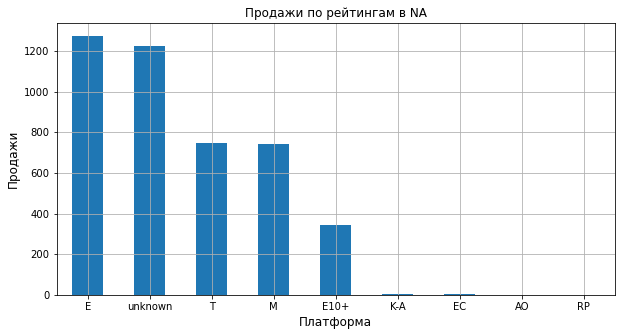

In [49]:
rating('na')

#### Влияние рейтинга в EU

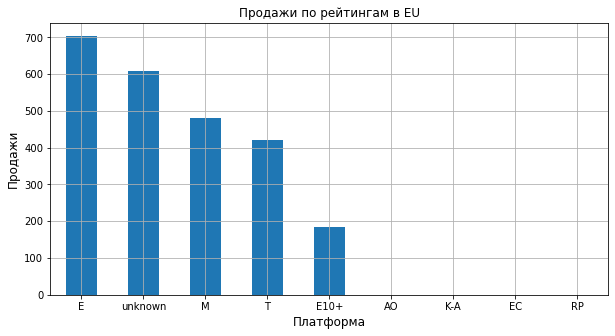

In [50]:
rating('eu')

#### Влияние рейтинга в JP

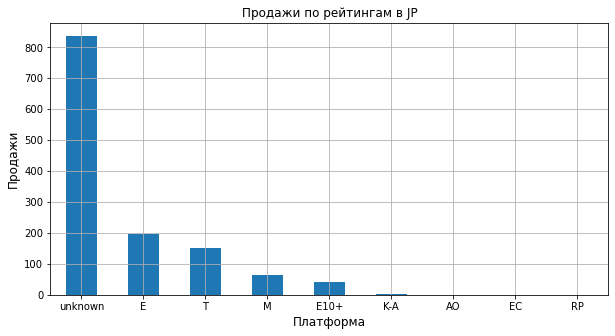

In [51]:
rating('jp')

Во всех регионах первые четыре места продажам занимают игры с рейтингом:
  - «E» («Everyone») — «Для всех»
  - «T» («Teen») — «Подросткам»
  - «M» («Mature») — «Для взрослых»
  - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

Продажи по регионам NA и EU распределены похожим образом, отличаются только объёмы продаж, так что, можно сделать вывод, что рейтинг не сильно сказывается на данных регионах, а вот в регионе JP рейтинг «M» — «Для взрослых» значительно уступает рейтингу «T» — «Подросткам», а также значительно выбиваются игры с неизвестным рейтингом, так как в Японии игры с рейтингом ESRB пользуются не таким большим спросом.

In [52]:
data_rating = data[~((data['critic_score'].isna()) & 
                     (data['user_score'].isna()) & 
                     (data['rating'] == 'unknown'))]

In [53]:
def rating_1(region):
    (
        data_rating
        .groupby('rating')[region+'_sales']
        .sum()
        .sort_values(ascending=False)
        .plot(kind='bar', grid=True, figsize=(10,5))
    )
    
    plt.title(f'Продажи по рейтингам в {region.upper()}')

    plt.xlabel('Платформа', fontsize=12)
    plt.ylabel('Продажи', fontsize=12)

    plt.xticks(rotation=0)

    plt.show()

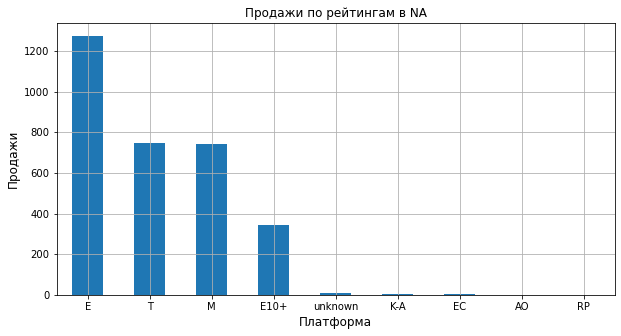

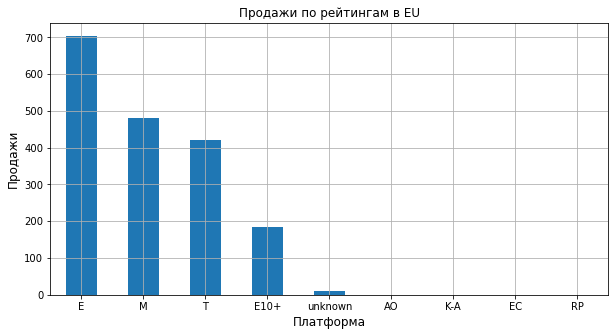

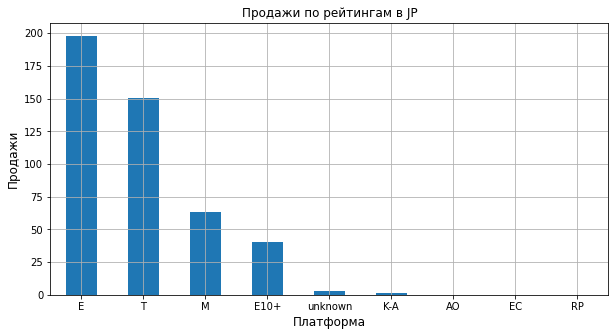

In [54]:
rating_1('na')
rating_1('eu')
rating_1('jp')

<a id='section_5'></a>
## Проверка гипотез

<a id='section_5_1'></a>
### Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Н1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [55]:
xone = valid_data[valid_data['platform'] == 'XOne']['user_score'].mean()
pc = valid_data[valid_data['platform'] == 'PC']['user_score'].mean()

if xone == pc:
    print(f'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: PC={round(pc,1)}, XOne={round(xone,1)}')
else:
    print(f'Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые: PC={round(pc,1)}, XOne={round(xone,1)}')

Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые: PC=6.3, XOne=6.1


In [56]:
from scipy import stats as st

In [57]:
data_test = valid_data[~((valid_data['user_score'].isna()) | (valid_data['user_score'] == -1))]

In [58]:
sample_1 = data_test[data_test['platform'] == 'XOne']['user_score']
sample_2 = data_test[data_test['platform'] == 'PC']['user_score']

alpha = 0.05

results = st.ttest_ind(sample_1,sample_2)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, p-значение:', results.pvalue)
else: 
    print('Отвергнуть нулевую гипотезу не получилось, p-значение:', results.pvalue)

Отвергнуть нулевую гипотезу не получилось, p-значение: 0.5535080500643661


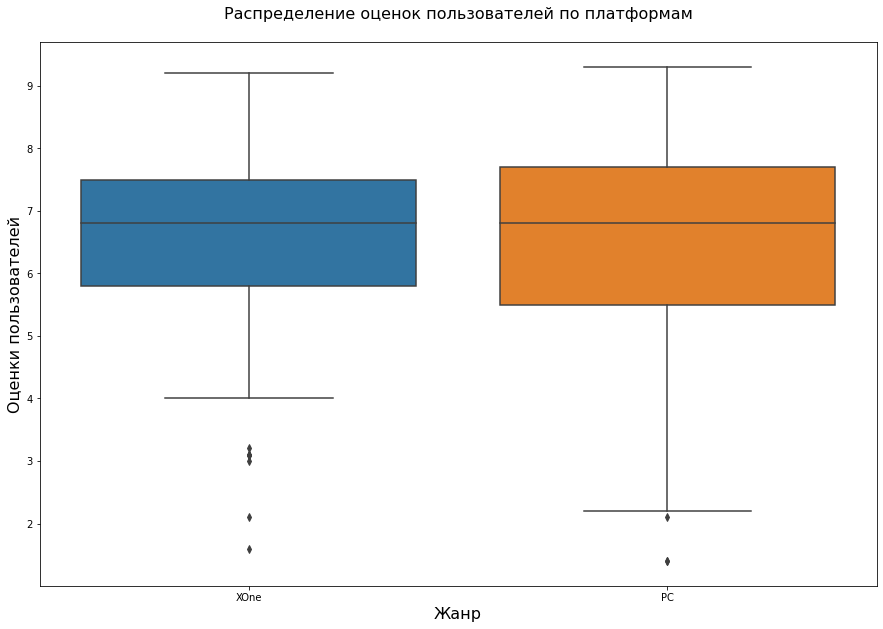

In [59]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(x=data_test[(data_test['platform'] == 'XOne') | (data_test['platform'] == 'PC')]['platform'], 
            y=data_test['user_score'])

plt.title('Распределение оценок пользователей по платформам'+"\n", fontsize=16)

plt.xlabel('Жанр', fontsize=16)
plt.ylabel('Оценки пользователей', fontsize=16)

plt.xticks(rotation=0)

plt.show()

<a id='section_5_2'></a>
### Гипотеза №2. Средние пользовательские рейтинги жанров Action и Sports разные

- Н0: Средние пользовательские рейтинги жанров Action и Sports разные
- Н1: Средние пользовательские рейтинги жанров Action и Sports одинаковые

In [60]:
sample_1 = data_test[data_test['genre'] == 'Action']['user_score']
sample_2 = data_test[data_test['genre'] == 'Sports']['user_score']

alpha = 0.05

results = st.ttest_ind(sample_1,sample_2)

if 1-results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, p-значение:', 1-results.pvalue)
else: 
    print('Отвергнуть нулевую гипотезу не получилось, p-значение:', 1-results.pvalue)

Отвергнуть нулевую гипотезу не получилось, p-значение: 1.0


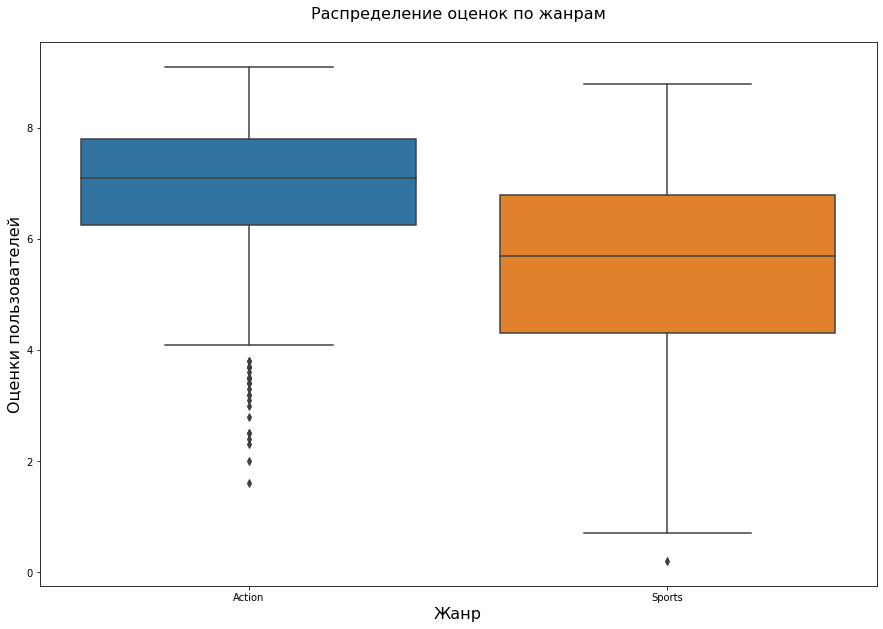

In [61]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(x=data_test[(data_test['genre'] == 'Action') | (data_test['genre'] == 'Sports')]['genre'], 
            y=data_test['user_score'])

plt.title('Распределение оценок по жанрам'+"\n", fontsize=16)

plt.xlabel('Жанр', fontsize=16)
plt.ylabel('Оценки пользователей', fontsize=16)

plt.xticks(rotation=0)

plt.show()

Гипотеза №1:
  - Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  - Н1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются  
  
Гипотеза №2:
  - Н0: Средние пользовательские рейтинги жанров Action и Sports разные
  - Н1: Средние пользовательские рейтинги жанров Action и Sports одинаковые 
  
Для проверки гипотез применяется критерий равенства средних двух генеральных совокупностей.

<a id='section_6'></a>
## Общий вывод

В ходе исследования были обработаны и проанализированы данные из открытых источников о продажах игр до 2016 года включительно. 
На этапе подготовки данных были заменены названия столбцов, удалены пропуски, не подлежащие восстановлению и изменены соответствующие типы данных.  
Затем было проведено исследование зависимотей в соответствии с целью проекта, составлены портреты пользователей из различных регионов, проверены гипотезы, а также сделаны выводы и рекомендации. 

**После проделанного исследования можно сделать следующие выводы:**
1. Пик релизов на рынке видеоигр приходится на 2008-2009 годы.
2. На момент 2016 года наблюдается значительная рецессия выпуска и продаж.
3. На момент 2016 года лидером продаж являются платформы PS4, XONE и 3DS. 
4. Потенциально прибыльными являются платформы PS4, XONE и РС за счёт положительного тренда релизов.
5. Самыми популярными платформами с 2012 года являются:
  - PS4
  - PS3
  - X360
  - 3DS
  - XOne
6. Оценки критиков находятся в средней корреляции с продажами игр.
7. Оценки пользователей не коррелируют с продажами.
8. Популярность жанра зависит от требовательности игры к активному участию пользователя в процессе.
9. Самый популярный жанр - `Sports`, самый непопулярный - `Adventure`.
10. Самым большим коэффициентом продаж в зависимости от выпущенных игр обладает жанр `Platform`.
11. Предпочтения пользователей из Японии значительно отличаются от предпочтений европейцев и американцев, которые в свою очередь, имеют схожие вкусы как в выборе платформ, так и жанров игр.
12. Выпуск игр категории «M» («Mature») — «Для взрослых» в Японии значительно ниже, чем в среднем по миру.
**Рекомендации:**
1. Обратить внимание на процесс выгрузки информации, так как в столбцах `critic_score`,`user_score`,`rating` одновремнно отсутствует часть данных об оценках.